# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [12]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [10]:
df = pd.read_csv("../Statistics Focus/orders.csv")
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


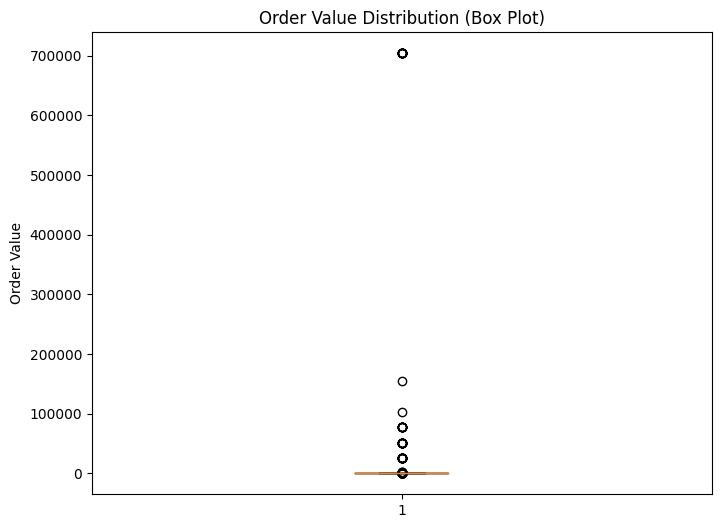

In [38]:
# Box plot of order_value
plt.figure(figsize=(8, 6))
plt.boxplot(df['order_value'])
plt.title('Order Value Distribution (Box Plot)')
plt.ylabel('Order Value')
plt.show()


## We can see that we have many outliers and that an order reaches 70,000$ this would definitely affect our mean since we have 7 outliers as seen from the boxplot. The median is a better measure of central tendency in this scenario as it is not affected by outliers. 

In [41]:
# 2. Propose a new metric
AOV = df['order_value'].mean()

# Calculate Median Order Value (MOV) and Interquartile Range (IQR)
MOV = df['order_value'].median()

Q1 = df['order_value'].quantile(0.25)
Q3 = df['order_value'].quantile(0.75)
IQR = Q3 - Q1

print(f"Average Order Value (AOV): ${AOV:.2f}")
print(f"Median Order Value (MOV): ${MOV:.2f}")
print(f"Interquartile Range (IQR): ${IQR:.2f}")

Average Order Value (AOV): $3145.13
Median Order Value (MOV): $284.00
Interquartile Range (IQR): $227.00


 ## Here we can see that the Interquartile Range and the Median Order value are close to each other and are actually reasonable numbers since lets assume each shoe is 120$ so this would mean that in each order a person is ordering 2 shoes.

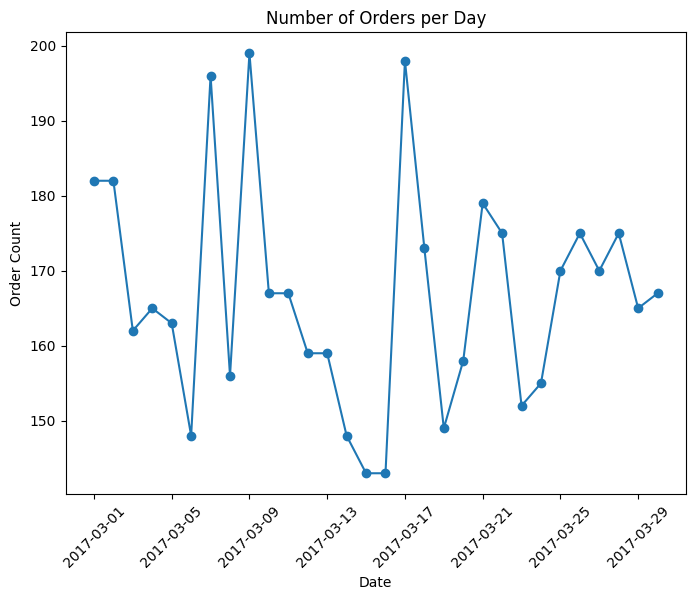

In [44]:
# 3. Analyze trends in customer purchasing behavior using the created_at column

# Convert 'created_at' to datetime and Extract date from 'created_at' and count orders for each date
total_orders_per_day = pd.to_datetime(df['created_at']).dt.date.value_counts()

# Plot daily order counts
plt.figure(figsize=(8, 6))
total_orders_per_day.plot(marker='o')
plt.title('Number of Orders per Day')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()


## From the plot we can see that the orders are prety stable at the beginning of March. Then around the 7th of March and 9th it peaks and then it goes dowwn till the 16th of march where it fluctuates between peaks and lows. We would need a broader view of time in order to be able to draw accurate conclusions on this data.